# Titanic Dataset Exploratory Data Analysis (EDA)
**Objective**: Analyze Titanic training data to uncover patterns, relationships, and insights using visual and statistical methods.

**Data source**: Kaggle – train.csv (~891 rows, includes “Survived” target)


**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


**Load Dataset**

In [2]:
df = pd.read_csv("train.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Dataset Overview
Check shape, data types, non-null info, summary statistics


In [3]:
print("Shape:", df.shape)
df.info()
df.describe(include='all').T
df.nunique().sort_values(ascending=False)


Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,891
Name,891
Ticket,681
Fare,248
Cabin,147
Age,88
SibSp,7
Parch,7
Embarked,3
Pclass,3


## Missing Values & Uniqueness
To identify where data is missing and potential duplicates


In [4]:
print("Missing values:")
print(df.isnull().sum().sort_values(ascending=False))

print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Duplicate rows: 0


In [5]:
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop("Cabin", axis=1, inplace=True)

# Drop Ticket and Name (not useful for EDA for now)
df.drop(["Ticket", "Name"], axis=1, inplace=True)

# Encode 'Sex' column
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

/tmp/ipython-input-2393486654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2393486654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


##**Exploratory Data Analysis**

In [7]:
# Dataset Info & Summary
df.info()

# Summary statistics
df.describe().T

# Value counts for target
df['Survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


,count
Survived,
0,549
1,342


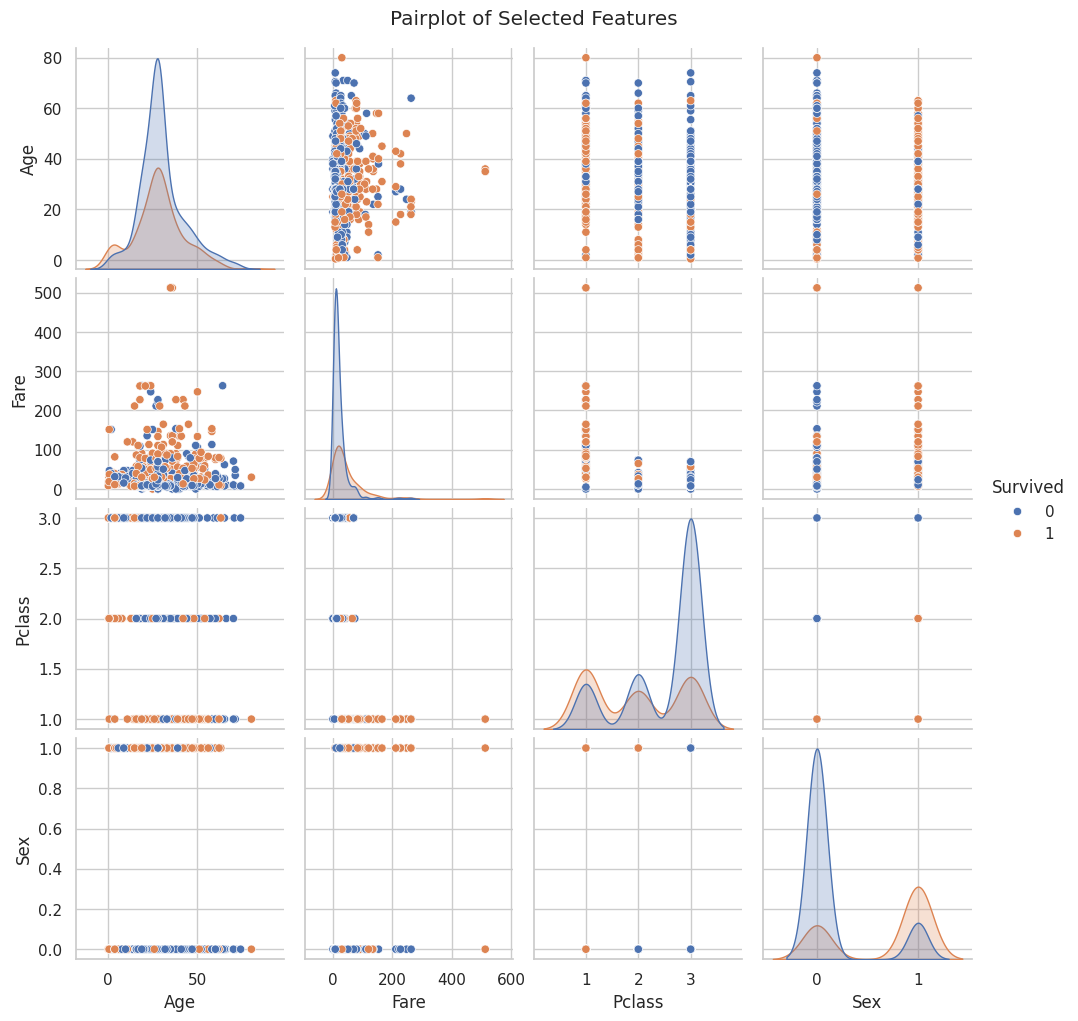

In [17]:
#1. Pairplot of all features
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

**Pairplot**

- Females had much higher survival rates than males.

- First-class passengers survived more often; third-class had lowest survival.

- Higher fares linked to higher survival.

- Age showed slight survival advantage for younger passengers.

/tmp/ipython-input-2786170547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


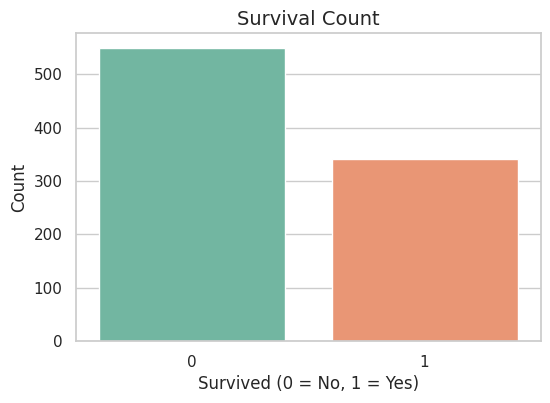

In [8]:
# 2. Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Survival Count**

- The dataset shows a higher number of passengers who did not survive compared to those who survived.

- This indicates the overall survival rate was low, likely less than 50%.

/tmp/ipython-input-2721315909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')


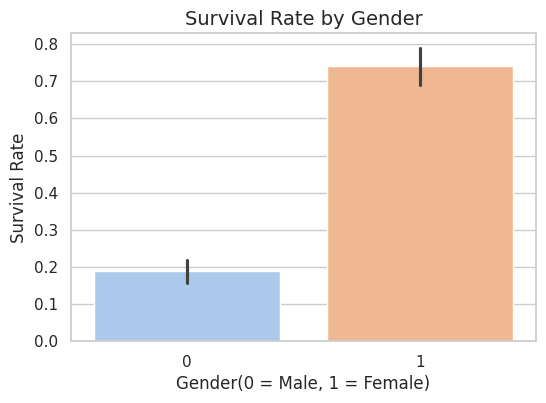

In [9]:
# 3. Survival by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender(0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

**Sex vs Survival**

Females had a significantly higher survival rate than males.

“Women and children first” pattern evident.

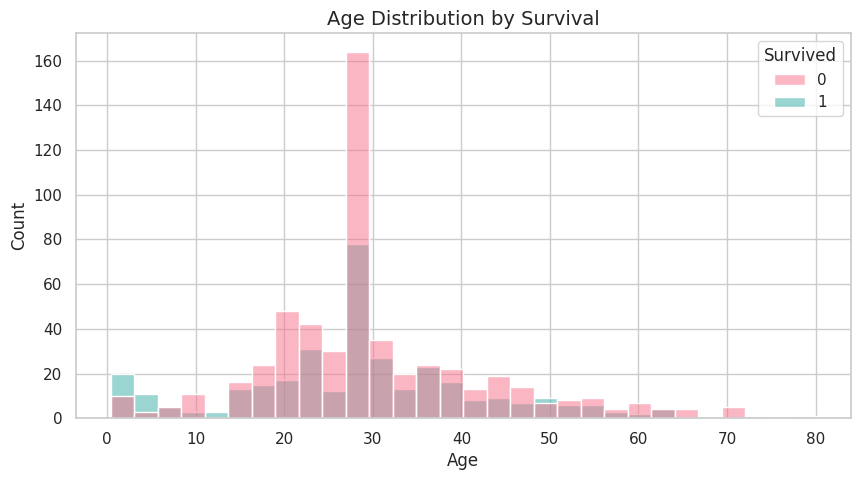

In [10]:
# 4. Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, palette='husl')
plt.title('Age Distribution by Survival', fontsize=14)
plt.show()

**Age Distribution by Survival**

- Majority aged 20–40; peak around 25–30.

- Children under 10 had relatively higher survival.

- Older passengers (60+) rarely survived.

/tmp/ipython-input-3251322391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')


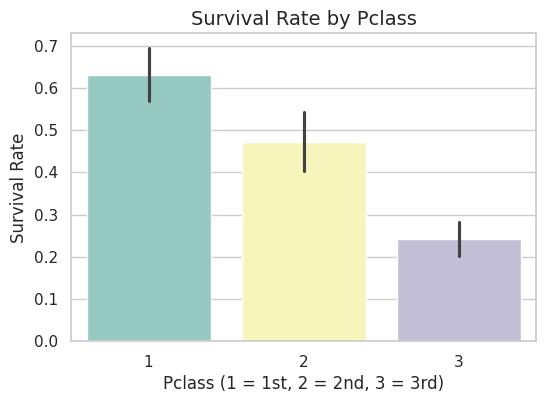

In [11]:
# 5. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Pclass', fontsize=14)
plt.xlabel('Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate')
plt.show()

**Pclass vs Survival**

1st class passengers had the highest survival rate.

3rd class passengers had the lowest survival rate — clear class-based disparity.

/tmp/ipython-input-3360354941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=df, palette='coolwarm')


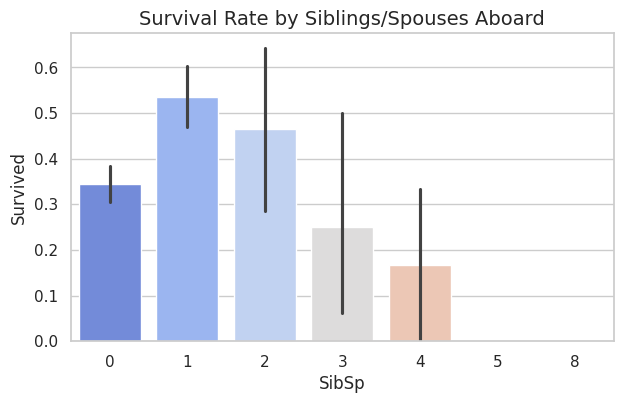

In [12]:
# 6. Survival by Number of Siblings/Spouses
plt.figure(figsize=(7, 4))
sns.barplot(x='SibSp', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Siblings/Spouses Aboard', fontsize=14)
plt.show()

 **Survival Rate by Siblings/Spouses Aboard**

- Best survival rates are for passengers with 1 or 2 siblings/spouses aboard (~50–55% survival).

- Passengers alone (0 SibSp) had a lower survival rate (~34%).

- Having 3 or more siblings/spouses drastically reduced survival rates, with 4 or more being especially low (~15%).

- Extremely large families (SibSp = 5 or 8) appear rare and have very poor survival rates (sample sizes here are tiny, so less reliable).

/tmp/ipython-input-1534749196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=df, palette='YlGnBu')


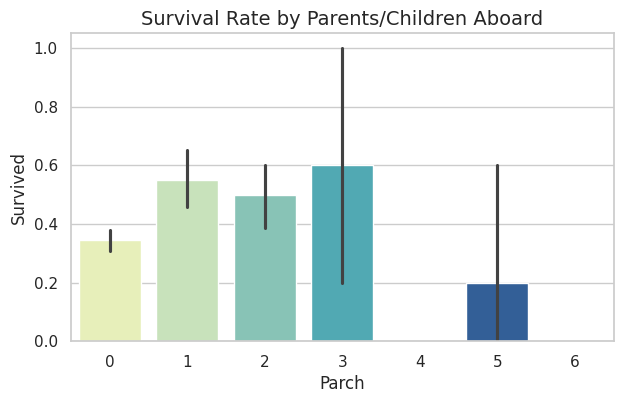

In [13]:
# 7. Survival by Number of Parents/Children
plt.figure(figsize=(7, 4))
sns.barplot(x='Parch', y='Survived', data=df, palette='YlGnBu')
plt.title('Survival Rate by Parents/Children Aboard', fontsize=14)
plt.show()

**Survival Rate by Parents/Children Aboard**

- Highest survival was for passengers with 1–3 parents/children aboard (~50–60%).

- Passengers alone (0 Parch) had a much lower survival rate (~33%).

- Having large families (≥4 Parch) greatly reduced survival chances — especially Parch = 5, which dropped to around 20%.

- Extremely high Parch counts (5–6) are rare in the dataset, so percentages there are less.

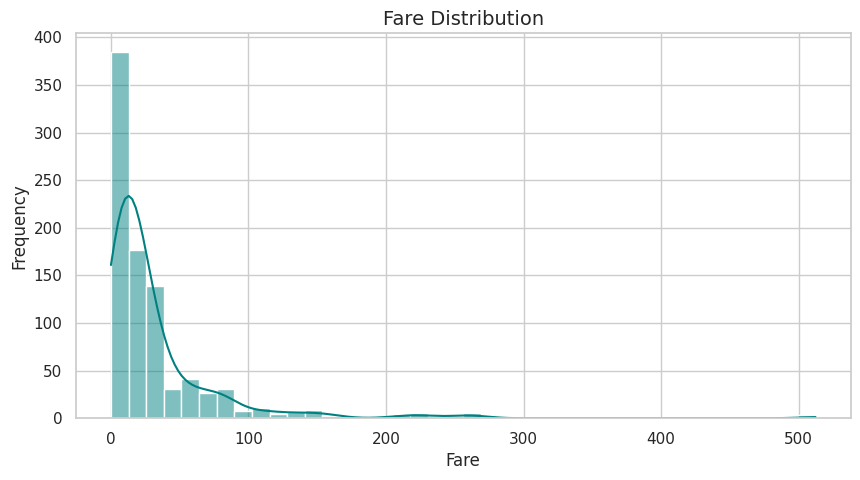

In [14]:
# 8. Fare Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Fare"], bins=40, kde=True, color='teal')
plt.title("Fare Distribution", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

**Fare Distribution**

- The fare distribution is highly right-skewed — most passengers paid relatively low fares.

- A large concentration of fares lies between 0 and 50 dollars, with the peak around 7–15 dollar.

- There are a few extreme outliers with fares exceeding 200, going up to ~500.

- The long tail suggests a small group of wealthier passengers (likely first-class) paying disproportionately high fares.

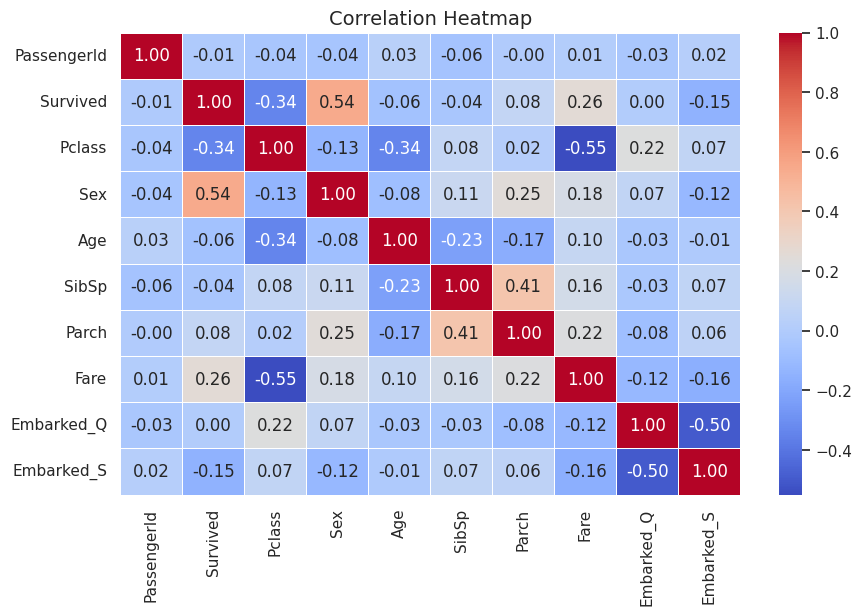

In [15]:
# 9. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

**Correlation Heatmap**

- Sex and Pclass have strong correlation with survival (negative for male & higher class number).

- Fare has a positive correlation with survival — higher fare, better survival odds.

- Age has weak correlation with survival.



#**Summary of Findings:**

##1. Non-survivors significantly outnumber survivors, indicating a low overall survival rate.

##2. Family size, passenger class, and fare appear to influence survival chances.

##3. Fare distribution is highly skewed, with most passengers paying low fares.

##4. Higher survival rates observed among passengers with small families compared to those alone or with large families